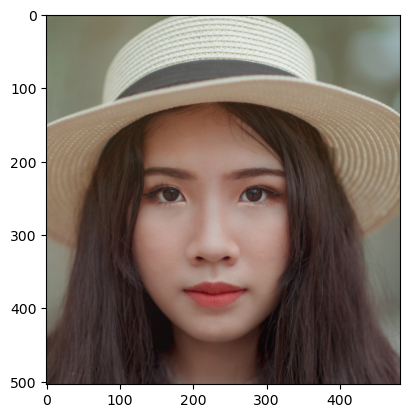

In [2]:
image = cv2.imread('./girl.png')
plt.imshow(image[:,:,::-1])

In [44]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

threshold = 0.6
image_size = 320
NMS_threshold = 0.7

def best_outcome(detected_data):
    bounding_box = []
    conf = []
    classes = []
    
    
    for i in detected_data:
        for j in i:
            value = j[5:]
            class_ids = np.argmax(value)
            confidence = value[class_ids]
            if confidence > threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                conf.append(confidence)
                classes.append(class_ids)
                
                
    predicted_box = cv2.dnn.NMSBoxes(bounding_box , conf , threshold , NMS_threshold)
    return predicted_box , bounding_box , conf , classes           
            
            
            
def final_detection(final_box , bounding , prob , classes , height , width):
    for i in final_box.flatten():
        k = bounding[i]
        x , y , w, h = k
        
        x = int(x * width)
        y = int(y * height)
        w = int(w * width)
        h = int(h * height)
        cv2.rectangle(image , (x,y) , (x+w , y+h) , (0,0,255) , 2)
        font = cv2.FONT_HERSHEY_COMPLEX
        label = class_names[classes[0]]
        c1 = prob[i]
        cc = round(c1,2)
        #print(label)
        #print(cc)
        text = str(label)+':'+str(cc)+' %'
        cv2.putText(image , text,(x , y-3), font , .5 , (255,0,0) , 1)


class_names = []

sol = open('./files/class_names' , 'r') 
for i in sol.readlines():
    class_names.append(i.strip())


#print(len(class_names))
image = cv2.imread('./car_image.jpg')
#plt.imshow(image[:,:,::-1])

# loading cfg file and weights file:

orginal_width = image.shape[1]
original_height = image.shape[0]


nn = cv2.dnn.readNetFromDarknet('./files/yolov3.cfg' , './files/yolov3.weights')

#print(nn.getLayerNames())  # complete architecture:

#print(nn.getUnconnectedOutLayers())  # which line yolo detection are going on:

#print(nn.getUnconnectedOutLayersNames()) # which layer names [detections in layers:]

# Getting image ready for Yolo object detection:


image_yolo = cv2.dnn.blobFromImage(image , 1 / 255 , (320,320) , True , crop = False)
#image_yolo.shape

# input your image to yolo:

nn.setInput(image_yolo)

#print(nn.getUnconnectedOutLayers())
c = nn.getLayerNames()
#print(c)
#print(nn.getUnconnectedOutLayers())
#print([c[i-1] for i in nn.getUnconnectedOutLayers()])

outputs = [c[i-1] for i in nn.getUnconnectedOutLayers()]

detected_data = nn.forward(outputs)

#detected_data[0].shape

predicted_box_1 , bounding_box_1 , conf_1 , classes_1 = best_outcome(detected_data)

final_detection(predicted_box_1 , bounding_box_1 , conf_1 , classes_1 , original_height / 320, original_height / 320)


In [45]:
cv2.imshow('image' , image)
cv2.waitKey()
cv2.destroyAllWindows()